In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

#압축된 파일을 전부 C:\사용자\\(사용자명)폴더 하위에 풀어주세요

#문제1

1-1) 첨부파일 '이직여부.csv'를 불러와서 변수에 할당하세요.

In [2]:
# 파일은 제가 원래 사용하던 폴더에 풀어줬습니당
data = pd.read_csv('C:/Users/USER/BITAmin/data/이직여부.csv')
data.head(3)

,Unnamed: 0,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,NaN,Other,1,36,1
1,1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,3.0,Pvt Ltd,>4,47,0
2,2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0


1-2) 해당 데이터셋을 이용하여 그림과 같은 결과를 도출해봅시다.
![title](문제1.png)

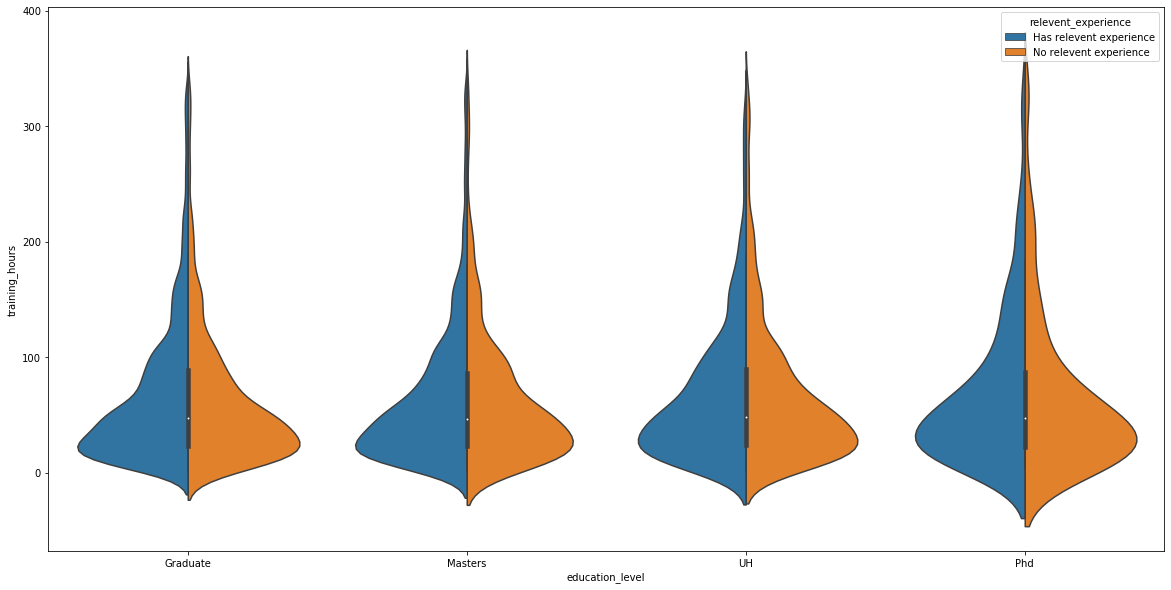

In [3]:
# figure 사이즈
plt.figure(figsize = (20,10))

# violinplot 그리기
sns.violinplot(x='education_level', y='training_hours', data=data, hue='relevent_experience', split=True)

# plot 확인
plt.show()

#문제2

mpg데이터셋은 다음과 같은 변수로 이루어져 있습니다!

manufacturer : 제조회사

model : 자동차 모델명

displ : 배기량

year : 생산년도

cyl : 실린더 개수

trans : 변속기 종류

drv : 구동방식

cty : 도시연비

hwy : 고속도로 연비

fl : 연료 종류

class : 자동차 종류

In [4]:
mpg = pd.read_csv("C:/Users/USER/BITAmin/data/mpg.csv", index_col = 0, encoding = "utf-8")
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4.0,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4.0,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4.0,manual(m6),f,20,31,p,compact


2-1) 각 column의 결측치를 확인하고 각 행의 "displ", "drv" 변수에 결측치가 있다면 해당 행 (주의 : 열이 아닌 행!)을 제거하세요

힌트 : dropna(subset = ["변수명"])

두 변수 외의 나머지 열들에 결측치가 있다면 이전 값으로 결측치를 치환해주세요

힌트 : 1주차 세션 내용 참고

In [5]:
# 결측치 확인
mpg.isnull().sum()

manufacturer     0
model            0
displ           12
year             0
cyl             10
trans            0
drv             15
cty              0
hwy              0
fl               0
class            0
dtype: int64

In [6]:
# 결측치 제거
mpg = mpg.dropna(how='any', subset=['displ','drv']).reset_index(drop=True)
mpg.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             9
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [7]:
# 결측치 대체
mpg = mpg.fillna(method='ffill')
mpg.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

2-2)
위의 전처리된 data를 가지고 아래 그림과 동일한 plot을 그리세요.

힌트 : 같은 종류의 plot을 범주형 변수에 따라 여러 개 그리고 싶을 때 이용하면 좋은 방법은?

모든 부분이 동일할 필요는 없지만 각 요소들을 신경써서 동일하게 만들어 주시면 더 좋습니다

데이터 내의 변수명을 x와 y 등 알맞은 요소에 할당하고 알맞은 함수명을 쓰기만 하면 정답처리되니 부담갖지 않으셔도 됩니다!

만약 동일하게 만들고 싶다면 신경써야 할 부분 : col_order, hue_order 알파벳순 정렬, col_wrap 변수 지정, legend 더하기
![python image](FacetGrid.png)

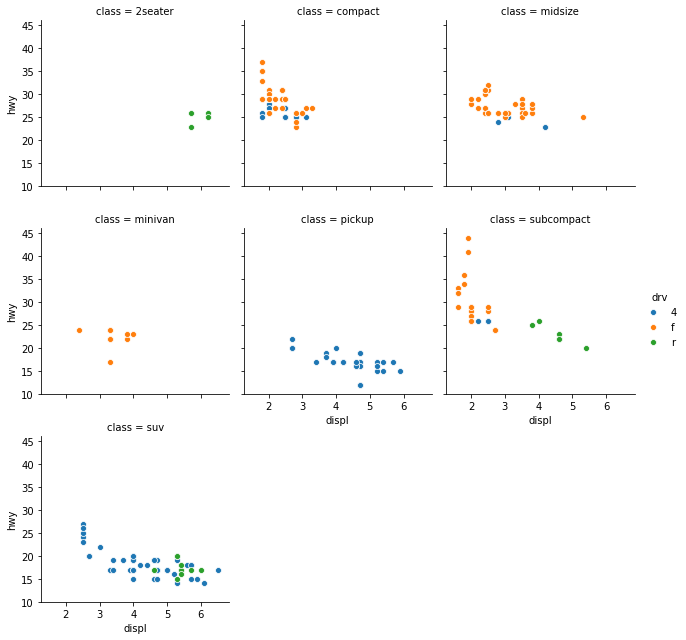

In [43]:
# FacetGrid
grid = sns.FacetGrid(data=mpg, col='class', hue='drv',
                     col_order = sorted(list(mpg['class'].unique())),
                     hue_order = ['4','f','r'],
                     col_wrap=3)
grid.map(sns.scatterplot, 'displ', 'hwy').add_legend()
plt.show()

2-3)
위의 그림을 보고 자동차의 배기량과 연비가 주로 어떤 상관관계를 보이는지 설명하세요.

그리고 배기량이 적고 연비가 높은 자동차를 사고 싶을 때 고려해야 할 특성을 설명해 주세요!

* 자동차의 배기량(displ)이 낮을 수록 연비(hwy)가 높은 경향이 있는 듯하다.(반비례 관계)

* 이때 구동방식(drv)을 고려해서 가장 좋은 자동차를 고를 수 있다.

#문제3

3-1) 첨부파일 'creditcard_scaled.csv'를 불러와서 변수에 할당하세요.

In [8]:
card = pd.read_csv('C:/Users/USER/BITAmin/data/creditcard_scaled.csv')
card.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,39979.0,1.225691,0.797307,-0.323241,1.507551,0.117843,-1.183613,0.266697,-0.235342,-0.157890,...,-0.035639,-0.004717,-0.143412,0.238138,0.691705,-0.280907,0.045598,0.066071,1.00,0
1,42562.0,-6.318443,4.965852,-2.993340,-0.425973,-2.451501,2.045547,-4.412875,1.017322,0.438795,...,-0.323319,0.577247,0.806392,-1.407135,0.181882,0.552227,0.454680,0.323052,1.00,0
2,35289.0,1.171988,0.012202,0.256847,0.316734,-0.131741,-0.030294,-0.144080,0.104147,-0.106890,...,-0.022035,-0.094901,-0.014294,-0.274264,0.287828,0.423796,-0.033225,-0.001433,19.99,0


3-2) 불러온 데이터셋으로 세션을 참고해 상관분석을 진행한 후, 'Class'열의 값이 0.5 보다 높은 열만 추려내보세요.

In [9]:
# 불균형 데이터 -> 크기 줄여주기
fraud = card[card['Class'] == 1]
non_fraud = card[card['Class'] == 0].sample(len(fraud)*5)
non_fraud.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
new_card = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

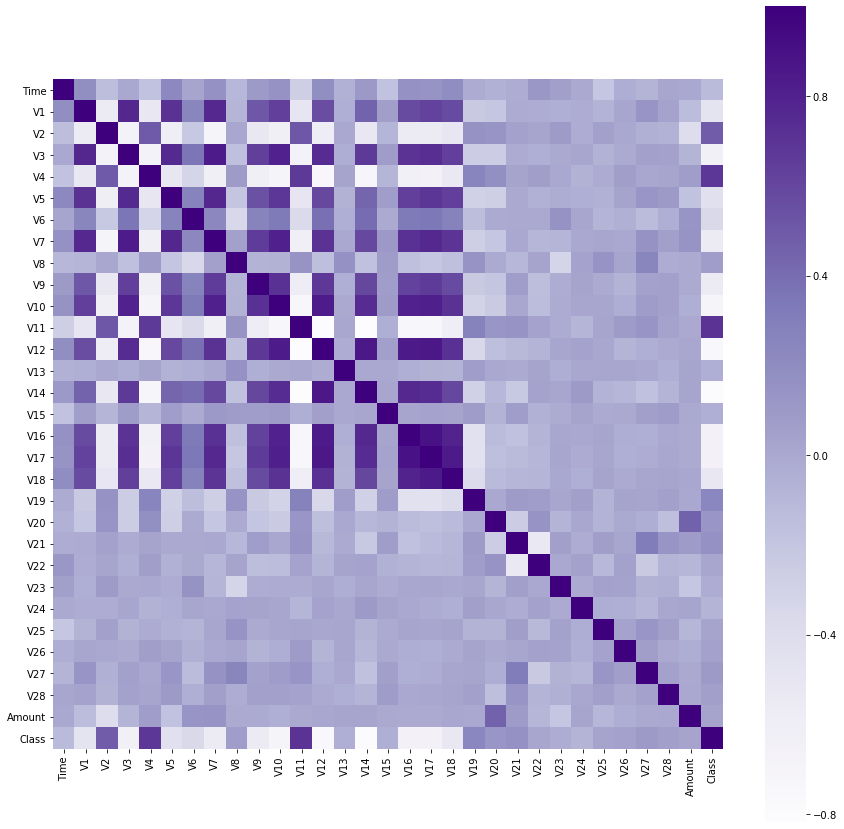

In [10]:
# 상관분석 및 히트맵
plt.figure(figsize=(15,15))
cor=new_card.corr()
sns.heatmap(cor, vmax=1, square=True, cmap=plt.cm.Purples)
plt.show()

In [16]:
# 'Class'와의 상관계수 값이 0.5 보다 높은 열만 추려내기
col = new_card.loc[:, cor['Class'] > 0.5] 
col.head() # 즉, V4, V11

,V4,V11,Class
0,0.439380,-0.913317,0
1,0.636956,0.258510,0
2,-0.630528,1.155590,0
3,0.867964,0.396816,0
4,-1.386830,-0.988150,0


3-3) subplot을 이용해 추려낸 열들의 plot을 시각화 해볼 차례입니다. 추려낸 열들의 갯수에 적당한 (행/열)구성을 subplot에 설정한 다음, 데이터 특성에 적당한 plot을 적용하여 한 화면안에 출력해보세요. (Hint1: 연속적인 값의 분포를 직관적으로 파악하기 좋은 plot이 적당하겠죠?) (Hint2: len()함수를 이용한, for문을 사용하는 것을 추천합니다.)

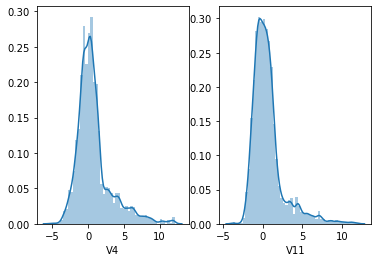

In [17]:
# Subplot
fig, ax = plt.subplots(ncols=2)
sns.distplot(col['V4'], ax=ax[0])
sns.distplot(col['V11'], ax=ax[1])

#보너스문제 

(버리긴 아까워서 보너스 문제로 드립니다! 따로 피드백 없이 답안 함께 첨부합니다 더 풀고싶으신 분들 도전!)

이직여부 데이터셋에서 거주지역 발전도 상위 25% 그룹은 'up75', 하위 75% 그룹은 'down75'값을 갖는 'development_group' 열을 데이터셋에 추가해보세요.

In [34]:
# '거주지역 발전도'; 상위 25% = 하위 75% = 제 3사분위수
Q3 = data['city_development_Index'].quantile(0.75)
Q3

0.92

In [41]:
# 'development_group'; 상위 25% -> up75, 하위 75 -> down75
data['development_group'] = np.where(data['city_development_Index']>Q3, 'up75', 'down75')
data['development_group']

0        down75
1        down75
2        down75
3        down75
4        down75
5        down75
6        down75
7        down75
8        down75
9        down75
10       down75
11       down75
12       down75
13         up75
14       down75
15       down75
16       down75
17       down75
18       down75
19         up75
20       down75
21       down75
22       down75
23       down75
24       down75
25       down75
26       down75
27       down75
28       down75
29       down75
          ...  
18496    down75
18497    down75
18498    down75
18499    down75
18500    down75
18501    down75
18502    down75
18503    down75
18504    down75
18505    down75
18506    down75
18507    down75
18508    down75
18509    down75
18510    down75
18511    down75
18512    down75
18513    down75
18514    down75
18515    down75
18516    down75
18517    down75
18518    down75
18519    down75
18520    down75
18521    down75
18522    down75
18523    down75
18524    down75
18525    down75
Name: development_group,

두 그룹을 한페이지에 Pie 플롯으로 시각화 해봅시다.

-두 그룹에 대한 각각의 그래프가 나타나도록 합니다.

-plot 안에 수치가 표시 되도록 하고, '정수%' 형태로 표시되도록 해주세요.

-각 범주의 라벨도 문자로 표시되도록 해주세요.

-title은 의미가 전달되도록 자유롭게 달아주세요

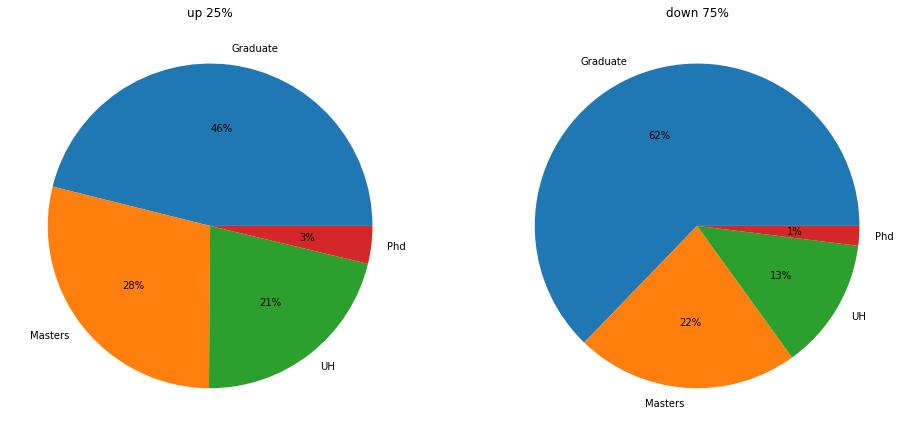

In [45]:
# ratio 변수 생성
v1 = data[data['development_group']=='up75']["education_level"].value_counts().values
v2 = data[data['development_group']=='down75']["education_level"].value_counts().values
r1 = v1 / v1.sum()
r2 = v2 / v2.sum()

# 라벨로 쓸 index변수 생성
index1 = data[data['development_group']=='up75']["education_level"].value_counts().index
index2 = data[data['development_group']=='down75']["education_level"].value_counts().index

# subplot 및 pie플롯 생성
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('up 25%')
plt.pie(r1,labels=index1,autopct = '%d%%')
plt.subplot(1, 2, 2)
plt.title('down 75%')
plt.pie(r2,labels=index2,autopct = '%d%%')
plt.show()